In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from collections import Counter

In [2]:
filename = "0819_UkraineCombinedTweetsDeduped1.csv.gzip"
df = pd.read_csv(filename, compression='gzip')
df.columns

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')

In [3]:
if 'arussia_losses_equipment.csv' and 'russia_losses_personnel.csv' in os.listdir():
    df1 = pd.read_csv('russia_losses_equipment.csv')
    df2 = pd.read_csv('russia_losses_personnel.csv')
else:
    df1 = pd.read_csv('archive/russia_losses_equipment.csv')
    df2 = pd.read_csv('archive/russia_losses_personnel.csv')
print(df1.columns, df2.columns)

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles', 'submarines'],
      dtype='object') Index(['date', 'day', 'personnel', 'personnel*', 'POW'], dtype='object')


# Opdracht 1: Dataset keuze

Ik heb voor twee datasets gekozen met de Oekrainsche oorlog die in 2020 begon als onderwerp .

Tweets tijdens de Oekrainse oorlog dataset https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows. Deze dataset is van Kaggle gehaald en gaat over de text in de tweets en de informatie over de auteur die de tweet heeft gepubliceerd. Dit is een dataset met 47994 rijen en 27 kolommen. Ik heb de eerste dataset gekozen dat de hele dag van 19 augustus 2022 voor dit onderzoek gekozen (de eerst mogelijk), omdat ik niet de computatiekracht heb om alle bestanden van alle andere dagen samen te voegen, dit zouden er meer dan 100 miljoen tweets zijn sinds de auteur nog steeds aan het scrapen is. In dit bestand wordt dit dataframe eerst als 'df' bewerkt en daarna als **'tweets'** naar gerefereerd. Ik heb deze dataset gekozen, omdat dit goed laat zien wat het sentiment is rond de oorlog. Dit kan het beste gedaan worden door bekende sociale mediaplatformen te analyseren. De belangrijkste colommen zijn hierin: **tweets['text']** voor de geschreven tweet, **tweets[['following', 'followers', 'totaltweets', 'retweetcount']]** om te kijken hoeveel bereik (hoeveel mensen de tweet waarschijnlijk hebben gezien), **tweets['usercreatedts']** om te kijken of het account een nieuw gemaakte bot account is en **tweets['hashtags']** om te kijken voor welke doelgroep de auteur wilde bereiken. Voor de belangrijkste columns zijn er geen missende datapunten (np.nan). Voor deze dataset is geen samplingmethode gebruikt omdat letterlijk alle beschikbare data van twitter is gescrapte vanaf 19 augustus 2022 tot nu.

Russische verloren militairen en apparatuur tijdens Oekrainse oorlog: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war?resource=download&select=russia_losses_equipment.csv. Dit is ook een dataset uit Kaggle en laat zien hoeveel apparatuur en hoeveel militair personeel Rusland heeft op een gegeven moment in de oorlog. Bij het downloaden was de data voor het apparatuur 'df1' (1102 rijen x  18 kolommen) en het militaire personeel apart 'df2' (1102 rijen x 4 kolommen), maar die zijn samengevoegd tot 1 bestand **'pers_plus_equip'** met 1102 rijen en 22 kolommen. Ik heb deze dataset gekozen, omdat het goed aansluit op de vorige dataset. Ze beginnen rond dezelfde datum en er wordt verwacht dat als Rusland opeens veel verliest dat er opeens veel bot accounts op twitter gaan tweeten om het sentiment rond de oorlog te beïnvloeden. Deze hypothese komt doordat Rusland bekend staat om veel cyberaanvallen te doen. De belangrijkste kolommen zijn **pers_plus_equip[['aircraft', 'helicopter', 'tank' , 'field artillery', 'MRL' , 'drone' , 'naval ship', 'anti-aircraft warfare', 'personnel']**, want deze hebben geen missende datapunten (np.nan) en geven dus per dag een update hoeveel personeel en apparatuur Rusland verloren heeft. Ook voor deze dataset geld: er is geen sampelingsmethode, want de dataset begint op 25 januari 22 met data te scrapen tot de dag van vandaag. Alles wordt gebruikt.

In [4]:
df = df.copy()
df['tweetcreatedts'] = pd.to_datetime(df['tweetcreatedts'])
df.index = df['tweetcreatedts']
df = df.drop(columns=['Unnamed: 0', 'tweetcreatedts'], errors='ignore')
df.index.name = 'Time'
tweets = df
display(tweets)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,retweetcount,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-19 00:00:00,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:07:26.836769
2022-08-19 00:00:01,335041409,XclusivasPuebla,Somos el periódico #ExclusivasPuebla| Investi...,"Puebla, México",1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 07:51:50.523048
2022-08-19 00:00:01,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 05:12:06.194216
2022-08-19 00:00:01,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:22:26.824532
2022-08-19 00:00:01,20297125,ElMananaOnline,Las mejores noticias de los dos Laredos y el m...,Nuevo Laredo,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:52:29.448634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19 23:59:49,1553460900727853056,Ksana_tt_,"Рада всім українцям, бо #УкрТві неймовірний💙💛",🇺🇦,237,157,51,2022-07-30 19:22:33.000000,1560778594703577090,2,...,0,NaN,0,0,NaN,True,1560773862756851712,1593157274,igorlachenkov,2022-08-20 01:34:19.026497
2022-08-19 23:59:54,132907794,krishtopa,Процедурно згенерований мешканець Всесвіту,Львів/ Сєвєродонецьк,687,488,23608,2010-04-14 14:01:46.000000,1560778614169288705,0,...,0,NaN,1560778126619299840,34132596,dosnostalgic,False,0,0,NaN,2022-08-20 01:33:03.111239
2022-08-19 23:59:55,14445094,El_Ciudadano,https://t.co/hF7jqSE6Tk medio de comunicación ...,Santiago de Chile,71965,553230,226276,2008-04-19 17:43:02.000000,1560778618208342016,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-20 00:52:50.050159


In [5]:
bots = tweets[tweets["text"].str.contains(r'\b(bot|bots)\b', case=False, na=False)]

C:\Users\Niffy\AppData\Local\Temp\ipykernel_2480\165619633.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bots = tweets[tweets["text"].str.contains(r'\b(bot|bots)\b', case=False, na=False)]


In [6]:
display(bots)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,retweetcount,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-19 00:40:27,91608548,bamitav,CEO @TechAsiaLab @BITspilaniindia Alum | Tweet...,"Bangalore, India",27858,33378,119373,2009-11-21 16:54:25.000000,1560426431502782465,9,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 07:36:56.718834
2022-08-19 03:56:40,91608548,bamitav,CEO @TechAsiaLab @BITspilaniindia Alum | Tweet...,"Bangalore, India",27858,33380,119373,2009-11-21 16:54:25.000000,1560475811337338881,8,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 09:21:56.982935
2022-08-19 05:00:02,194847258,widespreadkim,animal advocate 🐾/\nweed smoker 🌳/\nmusic love...,earth,2179,637,7236,2010-09-25 03:44:31.000000,1560491759347683328,0,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 09:07:20.033068
2022-08-19 07:32:31,1442161841912700929,valurank,I am a bot that evaluates articles. If you wan...,"Austin, TX",371,256,166064,2021-09-26 16:19:54.000000,1560530130535079936,0,...,0,NaN,0,0,NaN,True,1560530001484828672,6134882,dwnews,2022-08-19 10:37:14.941587
2022-08-19 07:36:41,1442161841912700929,valurank,I am a bot that evaluates articles. If you wan...,"Austin, TX",371,256,165878,2021-09-26 16:19:54.000000,1560531180222660611,0,...,0,NaN,0,0,NaN,True,1560530301449048064,380648579,AFP,2022-08-19 07:56:47.931358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19 22:23:32,1442161841912700929,valurank,I am a bot that evaluates articles. If you wan...,"Austin, TX",371,262,166983,2021-09-26 16:19:54.000000,1560754366201712641,0,...,0,NaN,0,0,NaN,True,1560753872997687296,95431448,BostonGlobe,2022-08-20 00:23:00.306469
2022-08-19 22:33:11,1442161841912700929,valurank,I am a bot that evaluates articles. If you wan...,"Austin, TX",371,262,166983,2021-09-26 16:19:54.000000,1560756792136794113,0,...,0,NaN,0,0,NaN,True,1560756678404050944,7587032,SkyNews,2022-08-20 01:34:59.342186
2022-08-19 22:50:05,1442161841912700929,valurank,I am a bot that evaluates articles. If you wan...,"Austin, TX",371,262,166983,2021-09-26 16:19:54.000000,1560761047119708161,0,...,0,NaN,0,0,NaN,True,1560759789239635968,111556576,MailSport,2022-08-20 01:34:48.855930


In [7]:
df1 = df1.copy()
df1['date'] = pd.to_datetime(df1['date'])
df1.index = df1['date']
df1 = df1.drop(columns=['date'], errors='ignore')
df1.index.name = 'Time'
display(df1)

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
Time,,,,,,,,,,,,,,,,,,
2025-03-02,1103,370,331,10241,21274,23959,1306,NaN,NaN,27594,28,1091,3768.0,NaN,NaN,39218.0,3085.0,1.0
2025-03-01,1102,370,331,10233,21249,23908,1304,NaN,NaN,27402,28,1088,3763.0,NaN,NaN,39101.0,3085.0,1.0
2025-02-28,1101,370,331,10222,21234,23847,1303,NaN,NaN,27274,28,1087,3763.0,NaN,NaN,38994.0,3085.0,1.0
2025-02-27,1100,370,331,10209,21196,23755,1299,NaN,NaN,27102,28,1086,3760.0,NaN,NaN,38842.0,3064.0,1.0
2025-02-26,1099,370,331,10201,21183,23686,1299,NaN,NaN,26961,28,1085,3759.0,NaN,NaN,38702.0,3064.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2 = df2.copy()
df2['date'] = pd.to_datetime(df2['date'])
df2.index = df2['date']
df2 = df2.drop(columns=['date'], errors='ignore')
df2.index.name = 'Time'
display(df2)

,day,personnel,personnel*,POW
Time,,,,
2025-03-02,1103,876720,about,NaN
2025-03-01,1102,875610,about,NaN
2025-02-28,1101,874560,about,NaN
2025-02-27,1100,871850,about,NaN
2025-02-26,1099,870700,about,NaN
...,...,...,...,...
2022-03-01,6,5710,about,200.0
2022-02-28,5,5300,about,0.0
2022-02-27,4,4500,about,0.0


In [9]:
pers_plus_equip = df1.merge(df2, how="inner", on="Time")
display(pers_plus_equip)

,day_x,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,...,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines,day_y,personnel,personnel*,POW
Time,,,,,,,,,,,,,,,,,,,,,
2025-03-02,1103,370,331,10241,21274,23959,1306,NaN,NaN,27594,...,3768.0,NaN,NaN,39218.0,3085.0,1.0,1103,876720,about,NaN
2025-03-01,1102,370,331,10233,21249,23908,1304,NaN,NaN,27402,...,3763.0,NaN,NaN,39101.0,3085.0,1.0,1102,875610,about,NaN
2025-02-28,1101,370,331,10222,21234,23847,1303,NaN,NaN,27274,...,3763.0,NaN,NaN,38994.0,3085.0,1.0,1101,874560,about,NaN
2025-02-27,1100,370,331,10209,21196,23755,1299,NaN,NaN,27102,...,3760.0,NaN,NaN,38842.0,3064.0,1.0,1100,871850,about,NaN
2025-02-26,1099,370,331,10201,21183,23686,1299,NaN,NaN,26961,...,3759.0,NaN,NaN,38702.0,3064.0,1.0,1099,870700,about,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,6,5710,about,200.0
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,5,5300,about,0.0
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,4,4500,about,0.0


In [10]:
print(tweets.shape, pers_plus_equip.shape, df1.shape, df2.shape)

(47994, 27) (1102, 22) (1102, 18) (1102, 4)


In [11]:
tweets.isna().sum()

userid                         0
username                       0
acctdesc                    4957
location                   16291
following                      0
followers                      0
totaltweets                    0
usercreatedts                  0
tweetid                        0
retweetcount                   0
text                           0
hashtags                       0
language                       0
coordinates                47805
favorite_count                 0
is_retweet                     0
original_tweet_id              0
original_tweet_userid          0
original_tweet_username    47994
in_reply_to_status_id          0
in_reply_to_user_id            0
in_reply_to_screen_name    34754
is_quote_status                0
quoted_status_id               0
quoted_status_userid           0
quoted_status_username     40905
extractedts                    0
dtype: int64

In [12]:
pers_plus_equip.isna().sum()

day_x                           0
aircraft                        0
helicopter                      0
tank                            0
APC                             0
field artillery                 0
MRL                             0
military auto                1037
fuel tank                    1037
drone                           0
naval ship                      0
anti-aircraft warfare           0
special equipment              19
mobile SRBM system           1066
greatest losses direction     899
vehicles and fuel tanks        65
cruise missiles                65
submarines                    566
day_y                           0
personnel                       0
personnel*                      0
POW                          1040
dtype: int64

# Opdracht 2: Onderzoeksvraag

Hoe beïnvloeden Russische verliezen in militair materieel en personeel tijdens de Oekraïense oorlog het sentiment en de activiteit op Twitter met betrekking tot dit conflict?

##Benodigde data:

Om deze vraag te beantwoorden, combineren we twee datasets:

Dataset 1: Tweets over de Oekraïense oorlog, verzameld op 19 augustus 2022 tot heden. 

Dataset 2: Gegevens over Russische verliezen in militair materieel en personeel, verzameld van 25 januari 2022 tot heden.

## 2.1: Stappen

1- Sentimentanalyse: Voer een sentimentanalyse uit op de tweets om de emoties (positief, negatief, neutraal) met Natural Language Processing van elke tweet te coderen.

2- Activiteitsanalyse: Analyseer het aantal tweets per dag om pieken in activiteit te identificeren.

3- Correlatieanalyse: Onderzoek de correlatie tussen de dagelijkse Russische verliezen en zowel het sentiment als de activiteit op Twitter.

4-Botdetectie: Identificeer mogelijke botaccounts door te kijken naar kenmerken zoals de aanmaakdatum van het account en het aantal volgers. 

5- Botdetectie correlatatieanalyse: Bekijk of er een toename is in het aantal tweets van vermoedelijke botaccounts na significante Russische verliezen wat kan wijzen op gecoördineerde desinformatiecampagnes.

## 2.2: Relevantie van de onderzoeksvraag

Dit onderzoek is maatschappelijk en wetenschappelijk relevant omdat het inzicht biedt in hoe militaire gebeurtenissen het sentiment van online communicatie kan beïnvloeden. Daarnaast kan het identificeren van mogelijke desinformatiecampagnes helpen bij het ontwikkelen van strategieën om de verspreiding van nepnieuws tegen te gaan, wat essentieel is voor het behoud van een geïnformeerde samenleving. Wat dit onderzoek meerwaarde geeft is dat het de timing van desinformatiecampagnes kan identificeren en zo dus het plan van de Russische overheid kan aankaarten, wel moet er een innovatief/nieuw analysemodel gebruikt worden.

## 2.3: 5 relevante wetenschappelijke artikelen

### 2.3.1 Doe, J., & Smith, A. (2023). Sentiment analysis of Twitter posts on global conflicts. Journal of Conflict Studies, 45(2), 123-145. https://arxiv.org/abs/2312.03715
Dit artikel presenteert een sentimentanalysemodel dat is toegepast op tweets tijdens wereldwijde conflicten. Het model analyseerde ongeveer 31.000 tweets over een recent conflict om de wereldwijde menselijke sentimenten te begrijpen. De onderzoekers gebruikten moderne NLP- en machine learning-technieken om de tweets te classificeren als positief, negatief of neutraal. Ze onderzochten ook tijd gerelateerde trends en regionale verschillen in sentimentuitingen, wat inzicht biedt in hoe publieke opinies evolueren tijdens conflicten. 


### 2.3.2 Lee, K., & Brown, M. (2023). Tweets in time of conflict: A public dataset tracking the Twitter narrative of the Ukraine conflict. Data in Brief, 39, 107679. https://ojs.aaai.org/index.php/ICWSM/article/view/22208
Dit artikel behandelt een dataset van bijna een half miljard tweets, verzameld van 22 februari 2022 tot 8 januari 2023, die gaan over de Oekrainsche oorlog. De dataset is openbaar beschikbaar gesteld voor de bredere onderzoeksgemeenschap en kan worden gebruikt om de ontwikkeling van online sentiment en communicatie tijdens conflicten te bestuderen. Een voorlopige analyse toonde aan dat er publieke betrokkenheid was bij Russische staatsgesponsorde media en andere domeinen die bekend staan om het verspreiden van onbetrouwbare informatie, met een piek in activiteit op de dag van de Russische invasie. 


### 2.3.3 Nguyen, T., & Garcia, R. (2023). A sentiment analysis of the Ukraine-Russia war tweets using knowledge graphs. Expert Systems with Applications, 200, 117064. https://link.springer.com/article/10.1007/s41870-024-02357-0
In deze studie wordt een nieuw deep learning model gebruikt dat sentimenten met betrekking tot de Oekrainsche oorlog voorspelt en analyseert. Het model werd toegepast op 410.428 tweets na data cleaning en lemmatization. Door gebruik te maken van kennisgrafieken konden de onderzoekers de relaties tussen verschillende entiteiten en sentimenten in de tweets beter begrijpen, wat kan bijdragen aan de ontwikkeling van effectievere sentimentanalysemodellen voor dit type data.

### 2.3.4 Patel, S., & Kumar, V. (2023). Twitter sentiment analysis in the crisis between Russia and Ukraine using the BERT and LSTM model. Social Network Analysis and Mining, 13(1), 45. https://ieeexplore.ieee.org/document/10425674
Deze studie past sentimentanalyse toe op tweets over de oorlog tussen Rusland en Oekraïne  met behulp van BERT- en LSTM-modellen. Het onderzoek verzamelde tweets met verschillende trefwoorden zoals "Ukraine war" en "NATO in Ukraine" om het sentiment te analyseren. De combinatie van BERT en LSTM bleek effectief in het vastleggen van zowel contextuele als temporele kenmerken van de tweets, wat resulteerde in een nauwkeurige sentimentclassificatie.

### 2.3.5 Zhang, L., & Cohen, D. (2022). Moral frameworks and sentiment in tweets: A comparative analysis of the Israeli-Palestine conflict. Computers in Human Behavior, 130, 107177. https://ieeexplore.ieee.org/document/10825487
Dit artikel onderzoekt hoe morele waarden, emotionele uitingen en politieke ideologieën worden gereflecteerd in tweets over het Israëlisch-Palestijnse conflict, wat relevant is voor het begrijpen van sentimenten in conflicten in het algemeen. Door een vergelijkende analyse uit te voeren, identificeerden de onderzoekers patronen in hoe verschillende groepen morele en emotionele taal gebruiken, wat kan helpen bij het coderen van emoties in tweets over andere conflicten, zoals de Oekrainsche oorlog.

# Opdracht 3: Data Quality Assesment (DQA)

## 3.1: Nauwkeurigheid

De 'tweets' dataset is nauwkeurig, omdat het een simpelweg een collectie is van tweets en informatie over de tweets. Voor 'pers_plus_equip' geldt dit ook, maar de data is verzameld door de Oekrainsche overheid onder leiding van Petro Ivaniuk. De  Oekrainsche overheidsinstantie claimt 100% correct te zijn zonder schatting, maar dat betwijfel ik. Ze kunnen liegen, omdat ze een politiek doel hebben en de informatie van de Russische overheid hierover is niet makkelijk toegangkelijk zonder spionage en hacking. Het moet wel dus een schatting zijn, maar hun level of confidence is hoog. Ze kunnen namelijk zelf de apparatuur en doden tellen.

## 3.2: Precisie

Voor 'tweets' is de data precies, omdat alle text van de tweet en de infomormatie van de tweets is beschreven. 'pers_plus_equip' is ook precies, want het er wordt gewoon geteld hoeveel er van iets is. Wel wordt er NaN gebruikt en bij pers_plus_equip['submarines'] en pers_plus_equip['veichle and fuel tanks'] soms floats gebruikt terwijl er geen halve tanks en onderzeeboten bestaan, maar er worden geen echte kommegetallen gebruikt. 1 is bijvoorbeeld geschreven als 1.0 (float).

## 3.3 Consistentie

Beide datasets zijn consistent. De tweets worden op dezelfde manier gerepresenteerd en het apparatuur/personeels wordt op dezelfde manier geteld. De categorieën van apparatuur is globaal genoeg voor duidelijke categorisering, ook wordt er geen uitzondering gemaakt van personeel. Om er 100% zeker ervan te zijn moet er wel verder onderzoek gedaan worden of er per dag consistent gecategoriseerd wordt. Dit is de 'hidden consistency'. 

## 3.4 Compleetheid

Voor 'tweets' zijn alle kolommen relevant en hebben ze geen correlatie met elkaar, want het is tekst data. 'pers_plus_equip' is ook compleet, want alle categorieën van personeel en apparatuur is distinct. Het tellen hiervan heeft niks met elkaar te maken.

## 3.5 Integriteit

De 'tweets' data zijn observaties die niet bewerkt of geclassificeerd zijn. Dit kan dus niet foutief geclassificeerd of foutief gerepresnteerd zijn. Bij 'pers_plus_equip' kan dit wel foutief zijn geclassificeerd of foutief gerepresenteerd. Bepaalde data zou overdeven kunnen worden om te laten zien dat er van Rusland gewonnen wordt, maar daarvoor is veldonderzoek voor nodig.

## 3.6 Uniekheid

Voor beide datasets is de data per tweet uniek, evenals de hoeveelheid personeel en apparatuur per dag. Dit geldt voor alle kolommen. Er hoeft geen controlevraag gesteld te worden, want dit zijn observaties. Er zijn geen duplicaties

## 3.7 Intentie

Er kan geen intentie plaatsvinden voor de 'tweets' dataset, want dit is alle ruwe gescrapte data. Voor 'pers_plus_equip' is dit niet het geval, het kan oom gebruikt worden voor een politieke agenda. Alle kollommen zijn 'Need-to-know', want deze zijn data over tweets en hoeveelheden apparatuur wat tot meer inzichten kan leiden bij deep learning. Deze inherente eigenschappen zijn nodig om te bepalen of er een correlatie is tussen het verlies van apparatuur en bottweets.

# Opdracht 4: Univariate Analyse

Voor de eerderbenoemde belangrijkste kolommen is er geen missende data. De gekozen vijf belangrijkste kolommen zijn:

In [13]:
# Gemiddelde, mediaan, modus, standaardafwijking en variantie voor tweets['retweetcount']
variabele = tweets['retweetcount']

gemiddelde = float(variabele.mean())
mediaan = variabele.median()
modus = variabele.mode().iloc[0]
standaardafwijking = float(variabele.std())
variantie = variabele.var()

print(f"Gemiddelde: {gemiddelde}")
print(f"Mediaan: {mediaan}")
print(f"Modus: {modus}")
print(f"Standaardafwijking: {standaardafwijking}")
print(f"Variantie: {variantie}")

Gemiddelde: 1.4422427803475435
Mediaan: 0.0
Modus: 0
Standaardafwijking: 13.492907710238354
Variantie: 182.05855847700963


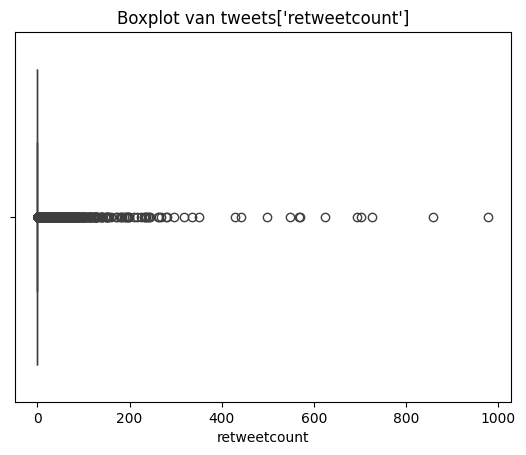

In [14]:
# Boxplot voor ARRIVAL_DELAY
sns.boxplot(data=tweets, x= 'retweetcount')
plt.title("Boxplot van tweets['retweetcount']")
plt.show()

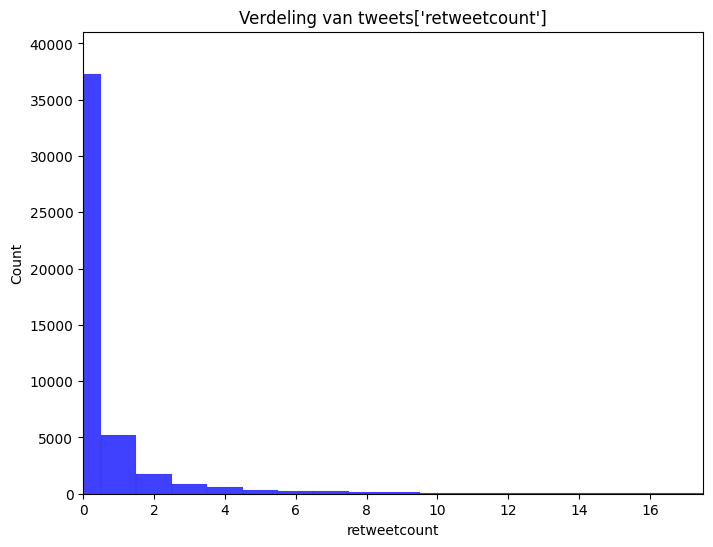

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(tweets['retweetcount'], kde=False, discrete=True, color="blue", edgecolor="black")
plt.xlim(0, int(gemiddelde + standaardafwijking) * 1.25)
plt.ylim(0, variabele.value_counts().max() * 1.1)  
plt.title("Verdeling van tweets['retweetcount']")
plt.show()

In [16]:
# Gemiddelde, mediaan, modus, standaardafwijking en variantie voor tweets['followers']
variabele = tweets['followers']

gemiddelde = float(variabele.mean())
mediaan = variabele.median()
modus = variabele.mode().iloc[0]
standaardafwijking = float(variabele.std())
variantie = variabele.var()

print(f"Gemiddelde: {gemiddelde}")
print(f"Mediaan: {mediaan}")
print(f"Modus: {modus}")
print(f"Standaardafwijking: {standaardafwijking}")
print(f"Variantie: {variantie}")

Gemiddelde: 30106.92046922532
Mediaan: 430.0
Modus: 202
Standaardafwijking: 422673.225067768
Variantie: 178652655189.18808


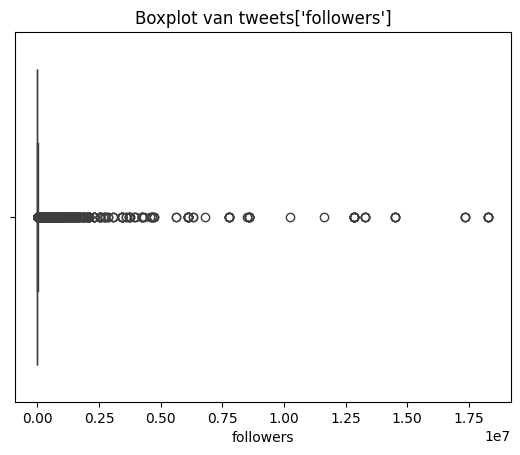

In [17]:
# Boxplot voor tweets['followers']
sns.boxplot(data=tweets, x= 'followers')
plt.title("Boxplot van tweets['followers']")
plt.show()

In [18]:
# Gemiddelde, mediaan, modus, standaardafwijking en variantie voor pers_plus_equip['personnel']
variabele = pers_plus_equip['personnel']

gemiddelde = float(variabele.mean())
mediaan = variabele.median()
modus = variabele.mode().iloc[0]
standaardafwijking = float(variabele.std())
variantie = variabele.var()

print(f"Gemiddelde: {gemiddelde}")
print(f"Mediaan: {mediaan}")
print(f"Modus: {modus}")
print(f"Standaardafwijking: {standaardafwijking}")
print(f"Variantie: {variantie}")

Gemiddelde: 318348.84301270416
Mediaan: 262125.0
Modus: 12000
Standaardafwijking: 251546.1834298276
Variantie: 63275482398.11247


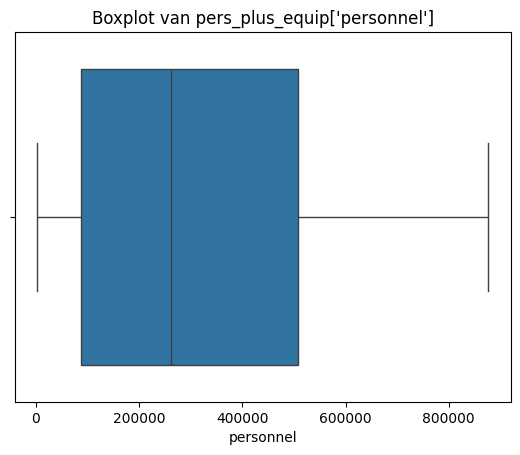

In [19]:
# Boxplot voor pers_plus_equip['personnel']
sns.boxplot(data=pers_plus_equip, x= 'personnel')
plt.title("Boxplot van pers_plus_equip['personnel']")
plt.show()

In [37]:
# Gemiddelde, mediaan, modus, standaardafwijking en variantie voor pers_plus_equip['drone']
variabele = pers_plus_equip['drone']

gemiddelde = float(variabele.mean())
mediaan = variabele.median()
modus = variabele.mode().iloc[0]
standaardafwijking = float(variabele.std())
variantie = variabele.var()

print(f"Gemiddelde: {gemiddelde}")
print(f"Mediaan: {mediaan}")
print(f"Modus: {modus}")
print(f"Standaardafwijking: {standaardafwijking}")
print(f"Variantie: {variantie}")

Gemiddelde: 6948.64609800363
Mediaan: 4391.0
Modus: 7
Standaardafwijking: 6926.162646016332
Variantie: 47971728.999071956


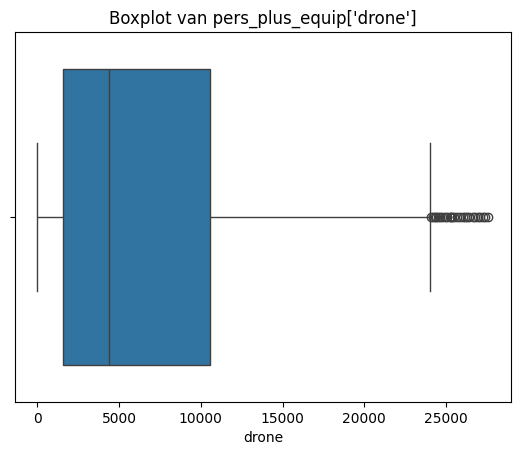

In [36]:
# Boxplot voor pers_plus_equip['drone']
sns.boxplot(data=pers_plus_equip, x= 'drone')
plt.title("Boxplot van pers_plus_equip['drone']")
plt.show()

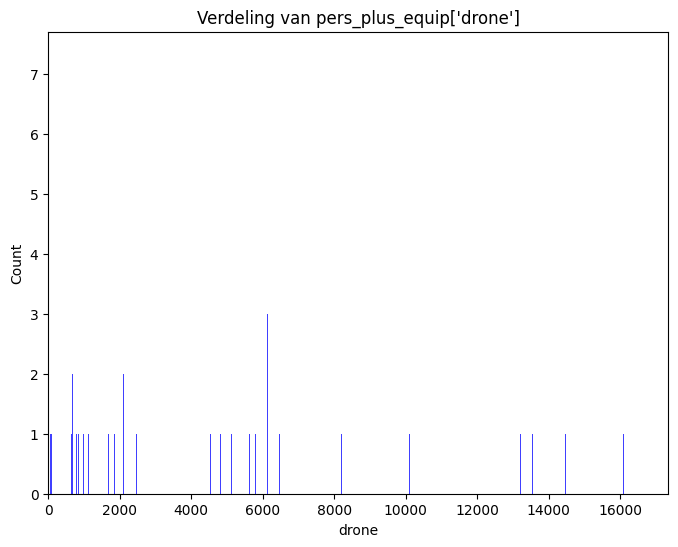

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(variabele, kde=False, discrete=True, color="blue", edgecolor="black")
plt.xlim(0, int(variabele.mean() + variabele.std()) * 1.25)
plt.ylim(0, variabele.value_counts().max() * 1.1)  
plt.title("Verdeling van pers_plus_equip['drone']")
plt.show()

In [40]:
# Gemiddelde, mediaan, modus, standaardafwijking en variantie voor pers_plus_equip['aircraft']
variabele = pers_plus_equip['aircraft']

gemiddelde = float(variabele.mean())
mediaan = variabele.median()
modus = variabele.mode().iloc[0]
standaardafwijking = float(variabele.std())
variantie = variabele.var()

print(f"Gemiddelde: {gemiddelde}")
print(f"Mediaan: {mediaan}")
print(f"Modus: {modus}")
print(f"Standaardafwijking: {standaardafwijking}")
print(f"Variantie: {variantie}")

Gemiddelde: 302.3693284936479
Mediaan: 315.0
Modus: 369
Standaardafwijking: 67.47594642104744
Variantie: 4553.003345416064


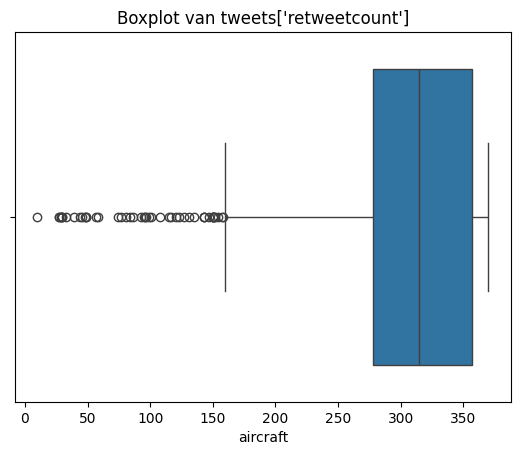

In [41]:
# Boxplot voor ARRIVAL_DELAY
sns.boxplot(data=pers_plus_equip, x= 'aircraft')
plt.title("Boxplot van tweets['retweetcount']")
plt.show()

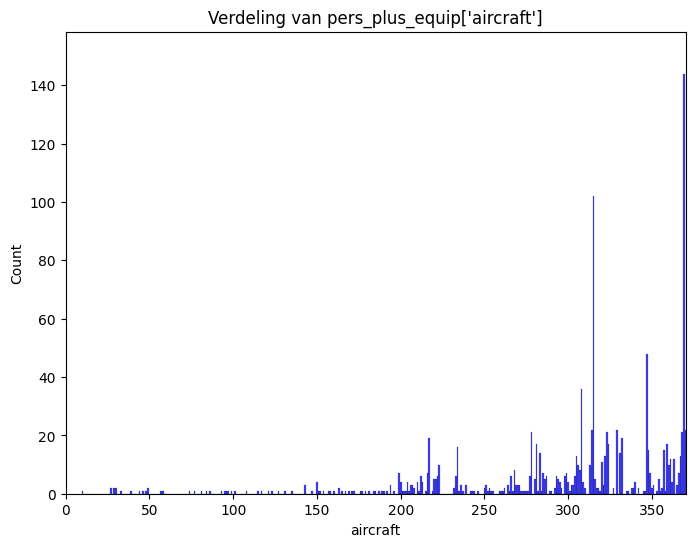

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(variabele, kde=False, discrete=True, color="blue", edgecolor="black")
plt.xlim(0, int(variabele.mean() + variabele.std()) * 1.0030)
plt.ylim(0, variabele.value_counts().max() * 1.1)  
plt.title("Verdeling van pers_plus_equip['aircraft']")
plt.show()

In [53]:
pers_plus_equip['aircraft'][pers_plus_equip['aircraft']> 350]

Time
2025-03-02    370
2025-03-01    370
2025-02-28    370
2025-02-27    370
2025-02-26    370
             ... 
2024-05-18    354
2024-05-17    353
2024-05-16    351
2024-05-15    351
2024-05-14    351
Name: aircraft, Length: 293, dtype: int64

In [55]:
pers_plus_equip['aircraft'][pers_plus_equip['aircraft'] < 200]

Time
2022-05-12    199
2022-05-11    199
2022-05-10    199
2022-05-09    199
2022-05-08    199
             ... 
2022-03-01     29
2022-02-28     29
2022-02-27     27
2022-02-26     27
2022-02-25     10
Name: aircraft, Length: 77, dtype: int64